In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
###-----
from scipy import interpolate
import utils as data_utils
from scipy.signal import welch
from scipy.fftpack import fftfreq, fft,rfftfreq,rfft,fftshift
import FeatureExtraction as Features

plt.style.use("..\\Plotting\\science_plot.mplstyle")

In [2]:
def norm(x):
    return x/np.amax(abs(x), axis=-1, keepdims=True)

## The range of frequency and Time period to window the signals.

In [3]:
Freq=np.arange(0.06,0.36,0.01)*1e3
Brust=5/(Freq*1e-3)
Fss=2
#------------------# velocity calculated
Velocity=pd.read_csv('EnergyVelocity.txt', skiprows=4, delimiter=';')
Freq_velocity=np.linspace(0.05,0.4,500)*1e3
print(Velocity.shape)
Velo_A0=Velocity[Velocity.keys()[1]]
fA0 = interpolate.interp1d(Freq_velocity, Velo_A0)(Freq)

(500, 3)


# Load the experiment and Simulation data
### However the simulation files contains only one frequency.
####

In [4]:
Exp_P=np.load('E:\Work\Work\POD_Analysis\POD_DATA\Experiment\Exp_Hole_DATA.npy')
Exp_D=np.load('E:\Work\Work\POD_Analysis\POD_DATA\Experiment\Exp_CRACKLENGTH_DATA.npy')
Exp_T=np.load('E:\Work\Work\POD_Analysis\POD_DATA\Experiment\Exp_TimeVector.npy')
Exp_CL=np.load('E:\Work\Work\POD_Analysis\POD_DATA\Experiment\Exp_CrackLengthInput.npy')
#-----------------------------------------
Nend=327
Exp_T_w_row=Exp_T[:Nend]
Exp_P_w_row=data_utils.window_Matrix_function(Exp_P[...,:Nend],Brust,fA0,Fss) # Number of Time domain
Exp_D_w_row=data_utils.window_Matrix_function(Exp_D[...,:Nend],Brust,fA0,Fss)
print(Exp_T_w_row.shape)
print(Exp_D_w_row.shape)

6
6
6
6
(327, 1)
(30, 21, 12, 4, 4, 327)


In [5]:
simFrequency=100
index=np.argmin(abs(Freq-simFrequency))
## Define the index for corresponding fA0 calculation
print("Simulation Excitation frequency is =",Freq[index])
Sim_P=np.load('E:\Work\Work\POD_Analysis\POD_DATA\Simulation\Sim_Hole_DATA.npy')
Sim_D=np.load('E:\Work\Work\POD_Analysis\POD_DATA\Simulation\Sim_CRACKLENGTH_DATA.npy')
Sim_T=np.load('E:\Work\Work\POD_Analysis\POD_DATA\Simulation\Sim_TimeVector.npy').T
Sim_CL=np.load('E:\Work\Work\POD_Analysis\POD_DATA\Simulation\Sim_CrackLengthInput.npy')
#--------------------------------------------
Sim_T_w_row=Sim_T
Sim_P_w_row=data_utils.window_Matrix_function(Sim_P,[Brust[index]],[fA0[index]],Fss) # Number of Time domain
Sim_D_w_row=data_utils.window_Matrix_function(Sim_D,[Brust[index]],[fA0[index]],Fss)

print(Sim_T_w_row.shape)
print(Sim_D_w_row.shape)

Simulation Excitation frequency is = 99.99999999999997
6
6
6
6
(299, 1)
(1, 20, 99, 4, 4, 299)


#### Figure for signal comparison.

In [6]:
np.broadcast_to(Sim_T_w_row.T,(99,299)).shape

(99, 299)

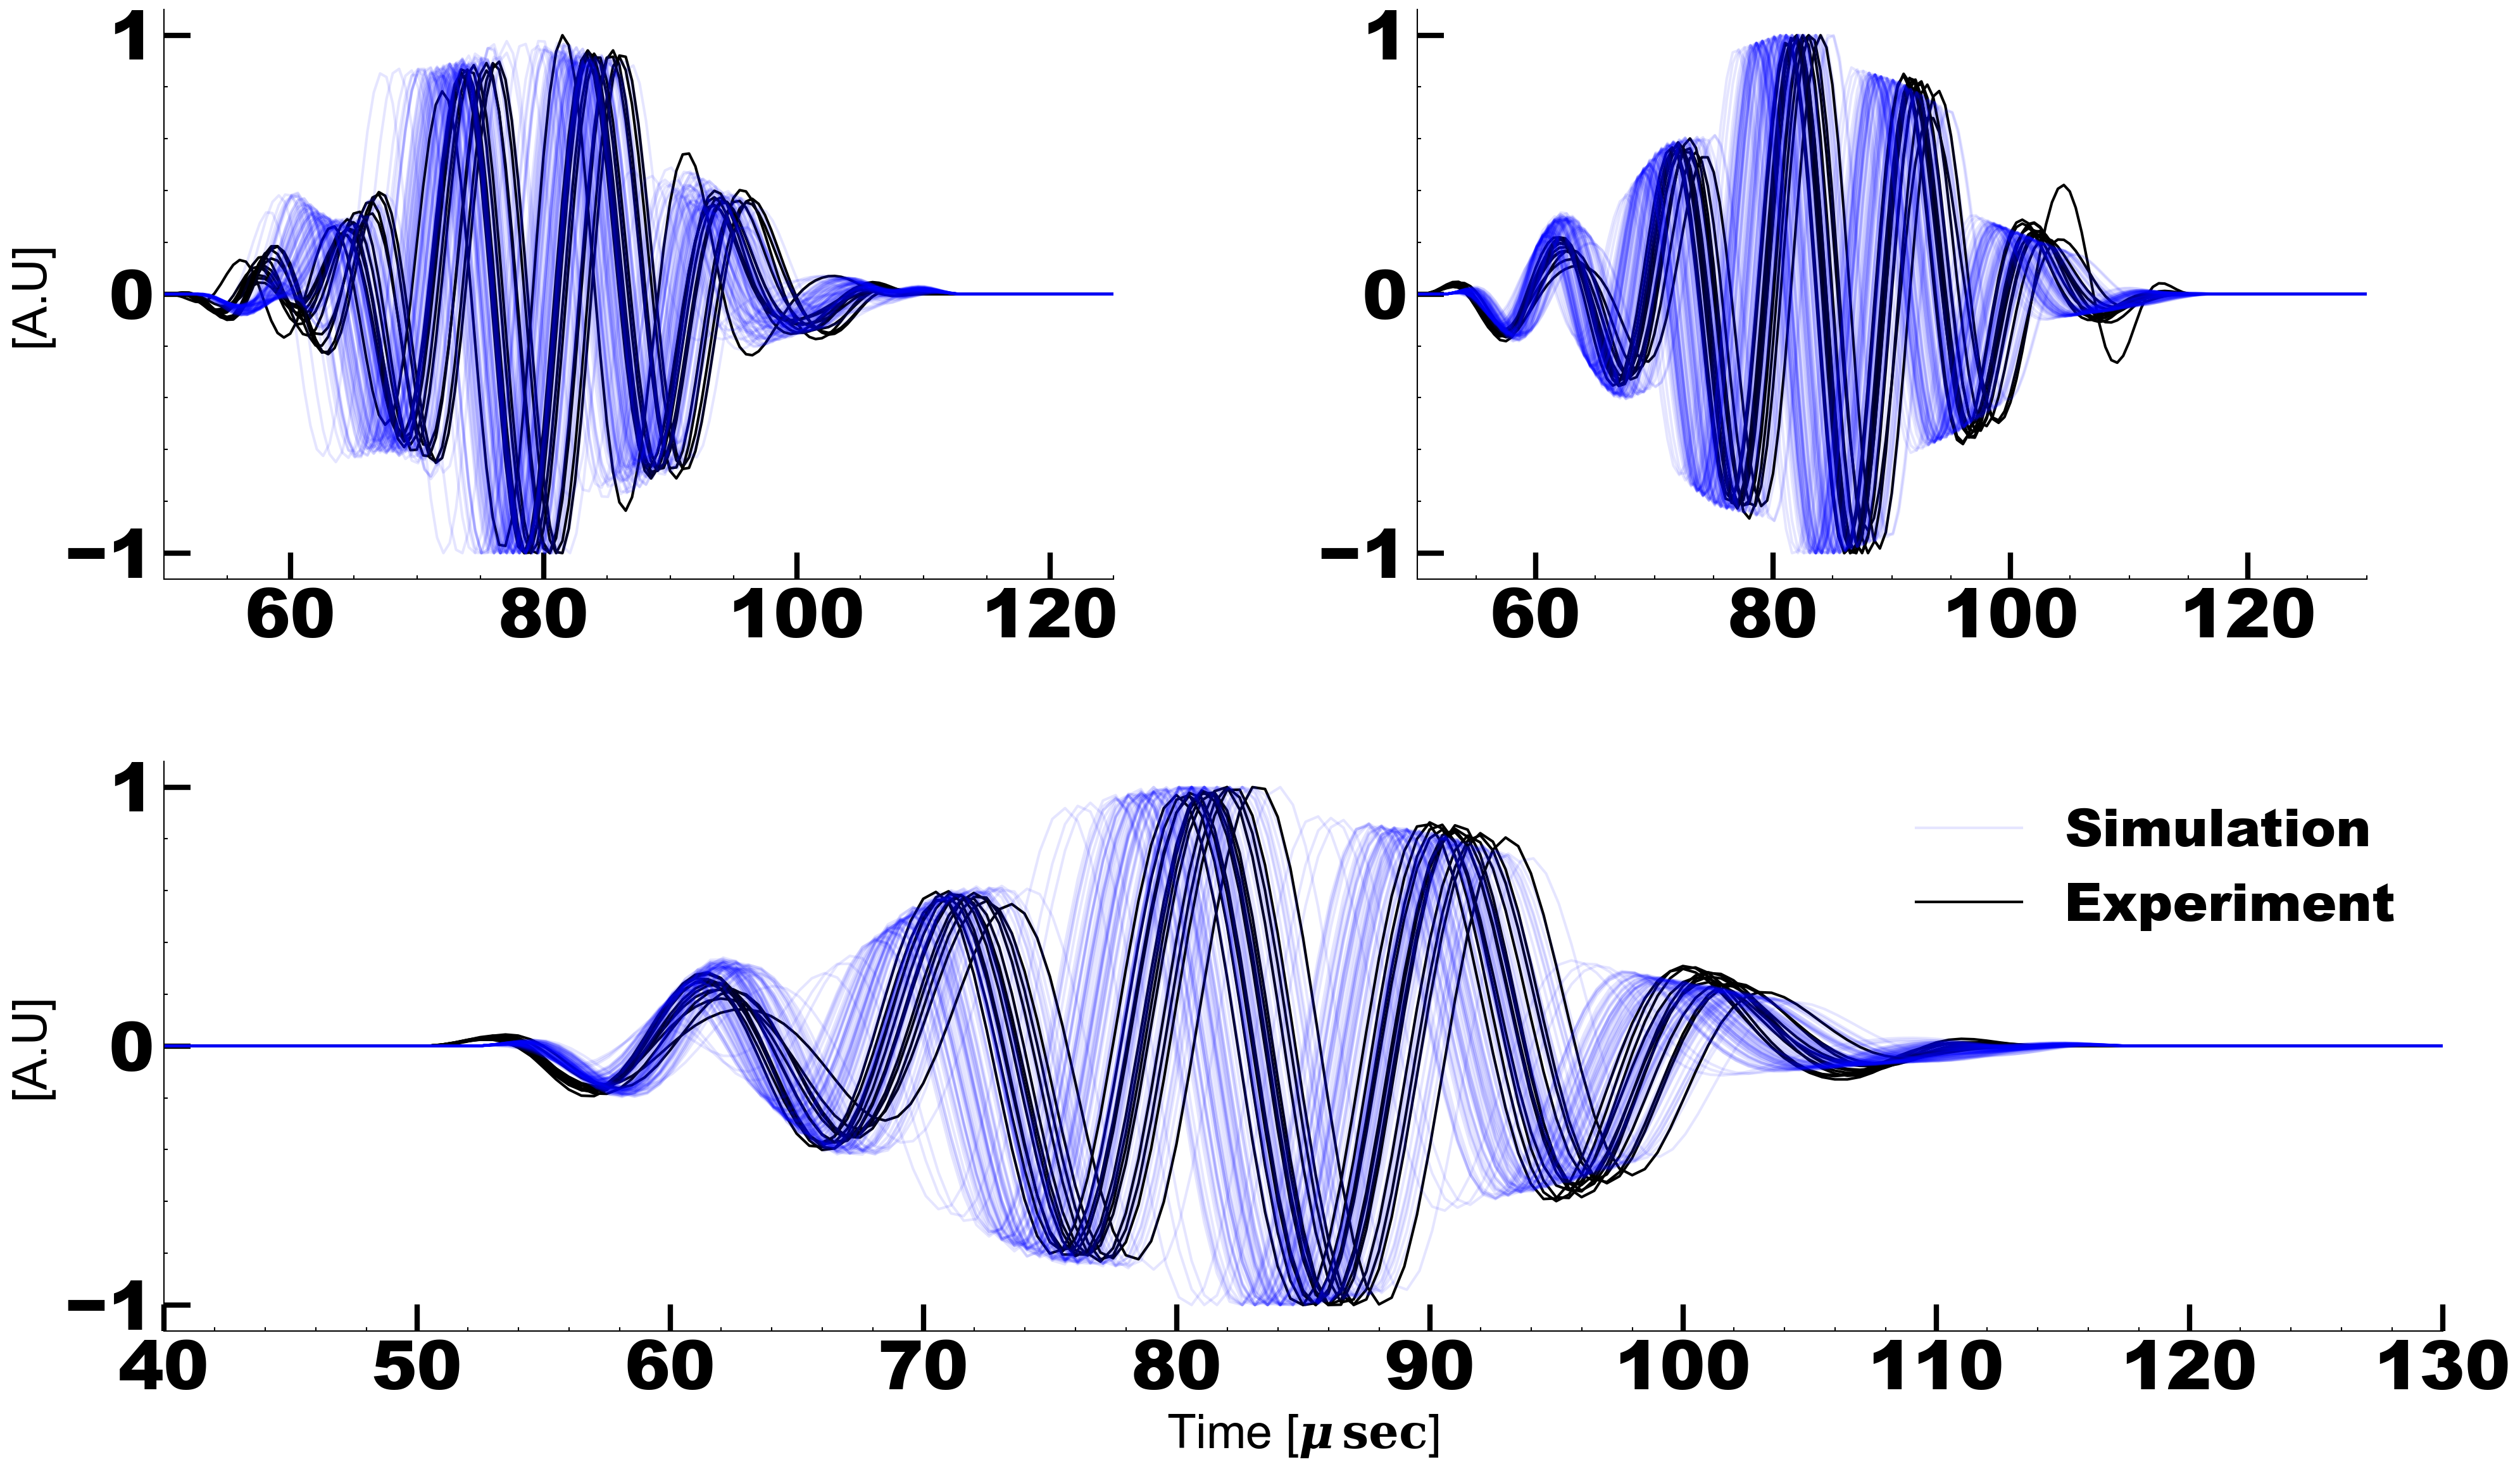

In [7]:
fig=plt.figure(figsize=(5,3), dpi=300)
ax1 = fig.add_axes([0, 0, 2.4, 1])
# ax4 = fig.add_axes([1.32, 0, 1, 1])
ax2 = fig.add_axes([0, 1.32, 1, 1])
ax3 = fig.add_axes([1.32, 1.32, 1, 1])
###-----------------------------------
for n_exp in np.arange(0,12,1):
    ax1. plot(Exp_T_w_row, norm(-Exp_P_w_row[4,0,n_exp,0,1,:]),c='k', alpha=1 )
    ax2. plot(Exp_T_w_row, norm(-Exp_P_w_row[4,0,n_exp,0,2,:]),c='k', alpha=1 )
    ax3. plot(Exp_T_w_row, norm(-Exp_P_w_row[4,0,n_exp,2,3,:]),c='k', alpha=1 )
for n_sim in np.arange(0,99,1):
    ax1. plot(Sim_T_w_row+1.6, norm(Sim_P_w_row[0,0,n_sim,0,1,:]), alpha=0.1,c='b', linestyle='-')
    ax2. plot(Sim_T_w_row+1.6, norm(Sim_P_w_row[0,0,n_sim,0,2,:]), alpha=0.1,c='b', linestyle='-')
    ax3. plot(Sim_T_w_row+1.6, norm(Sim_P_w_row[0,0,n_sim,2,3,:]), alpha=0.1,c='b', linestyle='-')
    ax1.set_xlim([40,130])
    ax2.set_xlim([50,125])
    ax3.set_xlim([50,130])

import matplotlib.lines as mlines
blue_line = mlines.Line2D([], [], color='blue',
                          markersize=20, label='Simulation', linestyle='-', alpha=0.1)
Red_line = mlines.Line2D([], [], color='black',
                          markersize=20, label='Experiment')
ax1.legend(handles=[blue_line,Red_line], fontsize=20)
ax1.set_xlabel('Time ['+"$\mu\, \sec$"+"]")
#_---------
ax1.set_ylabel('[A.U]')
ax2.set_ylabel('[A.U]')
path_save_fig_comp="E:\Paper\Els_paper2\Figure\Comaprison\\"
fig.savefig(path_save_fig_comp+'simu_Exp_signal_100kHz.pdf', dpi=600, transparent=False, bbox_inches='tight')
fig.savefig(path_save_fig_comp+'simu_Exp_signal_100kHz.png', dpi=600, transparent=False, bbox_inches='tight')


In [8]:
Exp=Features.FeatureExteraction(Exp_T_w_row,(Exp_P_w_row),(Exp_D_w_row))
Sim=Features.FeatureExteraction(Sim_T,(Sim_P_w_row),(Sim_D_w_row))


In [9]:
### Maximum sim
Exp.Maximum_Amplitude()
Sim.Maximum_Amplitude()
###----
Exp.fft_Damage_Index()
Sim.fft_Damage_Index()
###--
Exp.wavelet_trans_Damage_Index(index=4)
Sim.wavelet_trans_Damage_Index(index=0) # this will take time because of the data points
##
Exp.correlation_coefficient()
Sim.correlation_coefficient()
#---
Exp.psd_Damage_Index()
Sim.psd_Damage_Index()

DimMA=(30, 21, 12, 4, 4, 1)
DimMA=(1, 20, 99, 4, 4, 1)
DimFFT=(30, 21, 12, 4, 4, 1)
DimFFT=(1, 20, 99, 4, 4, 1)
Dim_CWT=(25, 21, 12, 4, 4, 327)
**we are taking the sum axis=0 and axis=-1 for Damage Index**
Dim_Sum_DamageIndex_CWT=(21, 12, 4, 4, 1)
Dim_CWT=(24, 20, 99, 4, 4, 299)
**we are taking the sum axis=0 and axis=-1 for Damage Index**
Dim_Sum_DamageIndex_CWT=(20, 99, 4, 4, 1)
DimCorr=(30, 21, 12, 4, 4, 1)
DimCorr=(1, 20, 99, 4, 4, 1)
DimPSD=(30, 21, 12, 4, 4, 1)
DimPSD=(1, 20, 99, 4, 4, 1)


### Maximum Amplitude

In [10]:
Exp_CL=np.load('E:\Work\Work\POD_Analysis\POD_DATA\Experiment\Exp_CrackLengthInput.npy')


(30, 21)


Text(0, 0.5, '$DI_{MA}$')

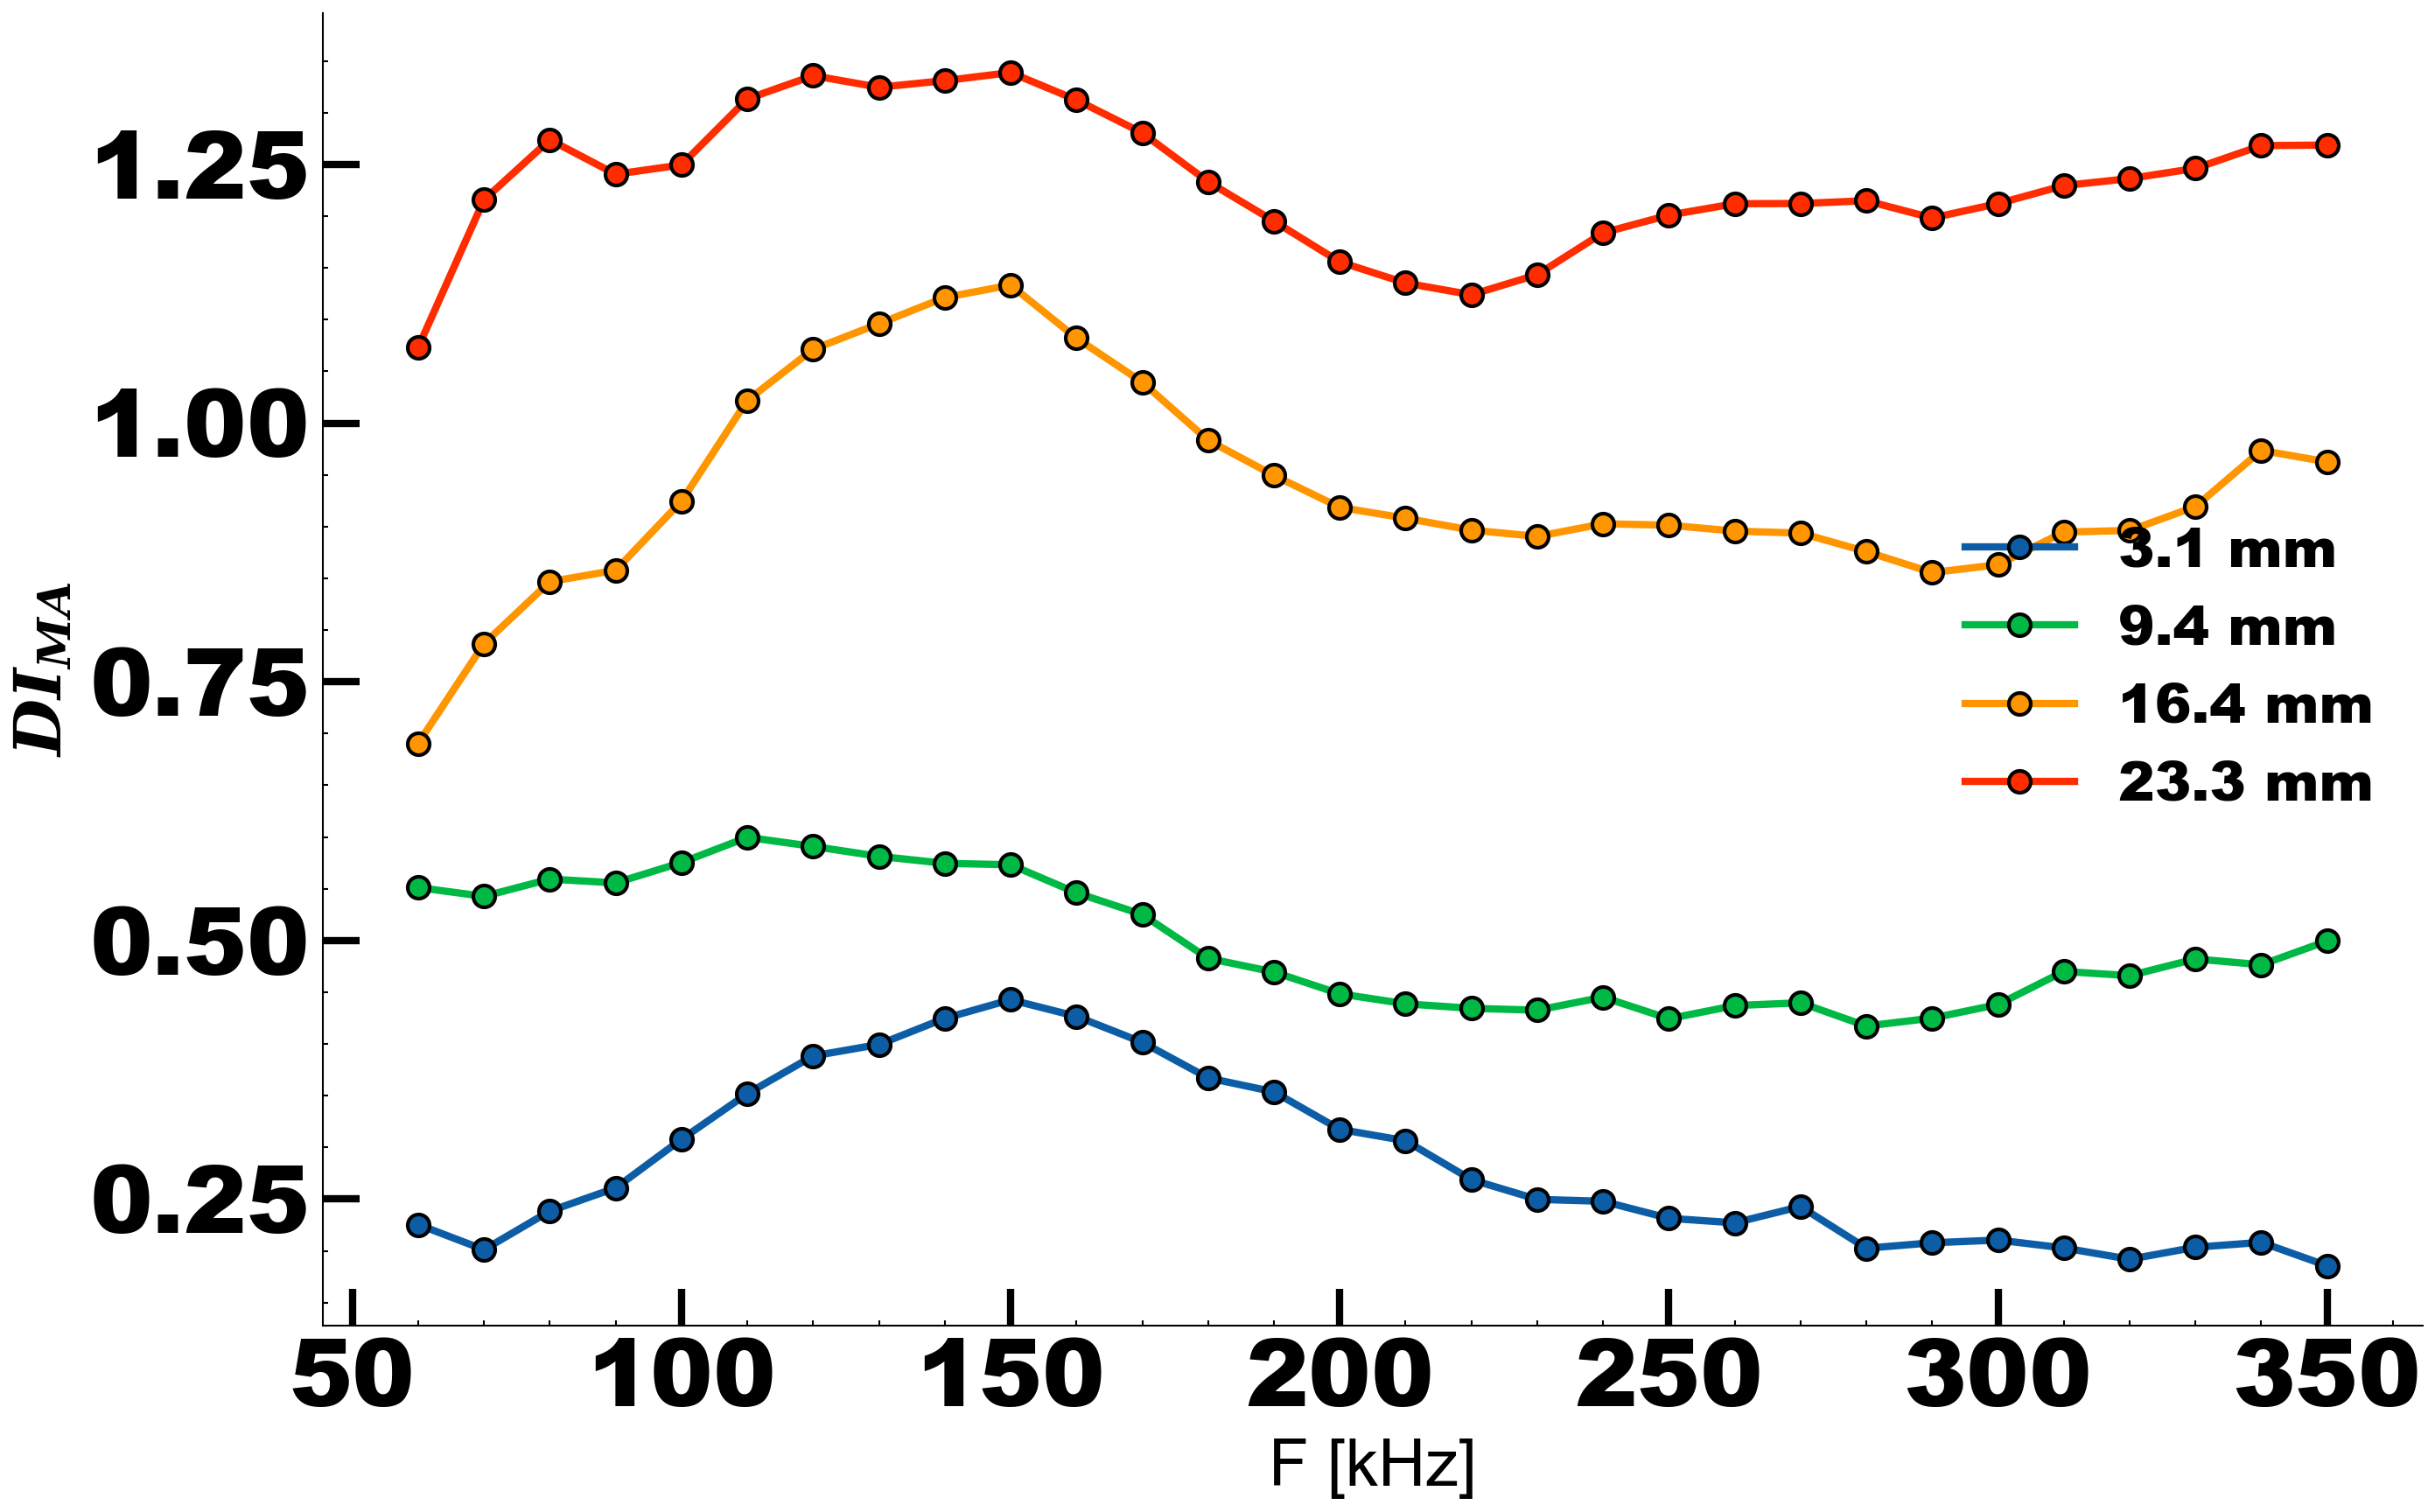

In [11]:
Z_MA=np.mean(Exp.MA, axis=2)[:,:,0,1,0] # mean at the samples 
print(Z_MA.shape)
x_MA=Freq
y_MA=np.mean(Exp_CL, axis=-1)
xv, yv = np.meshgrid(x_MA, y_MA, indexing='xy')
fig=plt.figure(figsize=(8,5))
ax0=fig.add_axes([0,0,1,1])
for i in np.arange(1,21,5):
    ax0.plot(x_MA, Z_MA[:,i], marker='o', label=str(np.round(y_MA[i],1))+' mm', linewidth=2,markeredgecolor='k' )
ax0.legend(fontsize=15)
ax0.set_xlabel('F [kHz]')
ax0.set_ylabel('$DI_{MA}$')


In [12]:
Exp.max_PSD.shape

(30, 21, 12, 4, 4, 1)

(30, 21)


Text(0, 0.5, '$DI_{PSD}$')

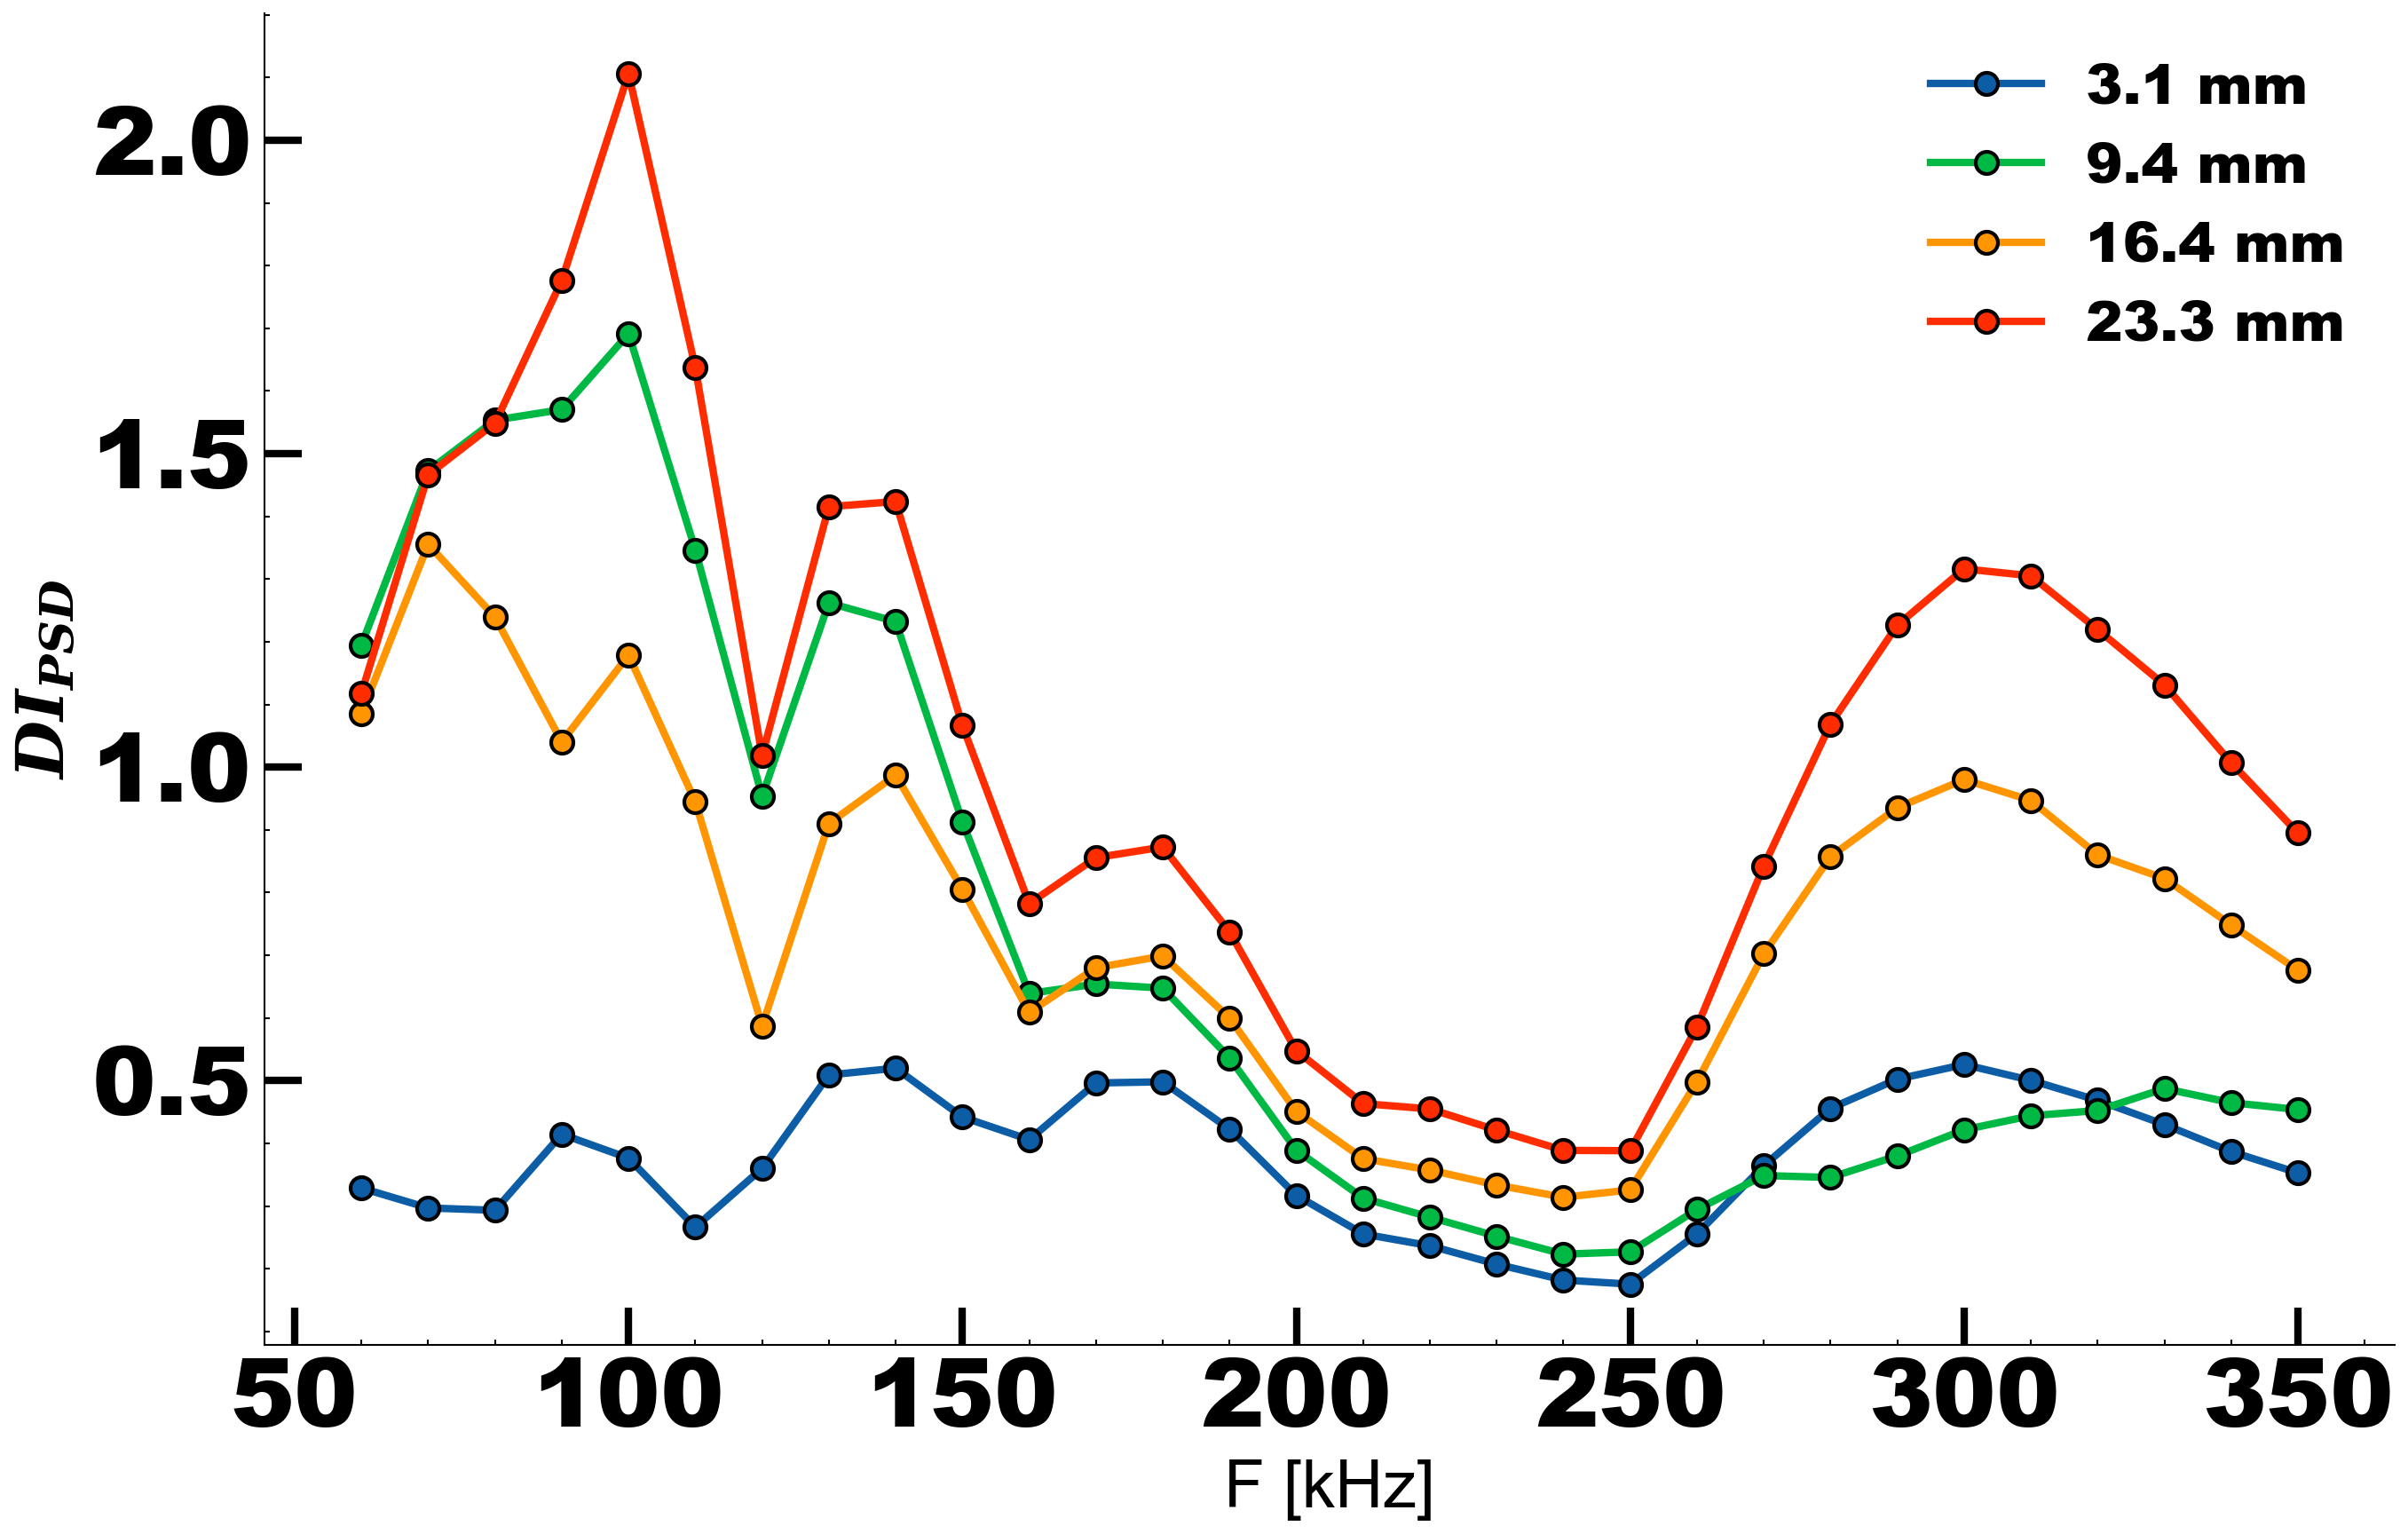

In [13]:
Z_PSD=np.mean(Exp.max_PSD, axis=2)[:,:,0,1,0] # mean at the samples 
print(Z_MA.shape)
x_MA=Freq
y_MA=np.mean(Exp_CL, axis=-1)
xv, yv = np.meshgrid(x_MA, y_MA, indexing='xy')
fig=plt.figure(figsize=(8,5))
ax0=fig.add_axes([0,0,1,1])
for i in np.arange(1,21,5):
    ax0.plot(x_MA, Z_PSD[:,i], marker='o', label=str(np.round(y_MA[i],1))+' mm', linewidth=2,markeredgecolor='k' )
ax0.legend(fontsize=15)
ax0.set_xlabel('F [kHz]')
ax0.set_ylabel('$DI_{PSD}$')

(30, 21)


Text(0, 0.5, '$DI_{FFT}$')

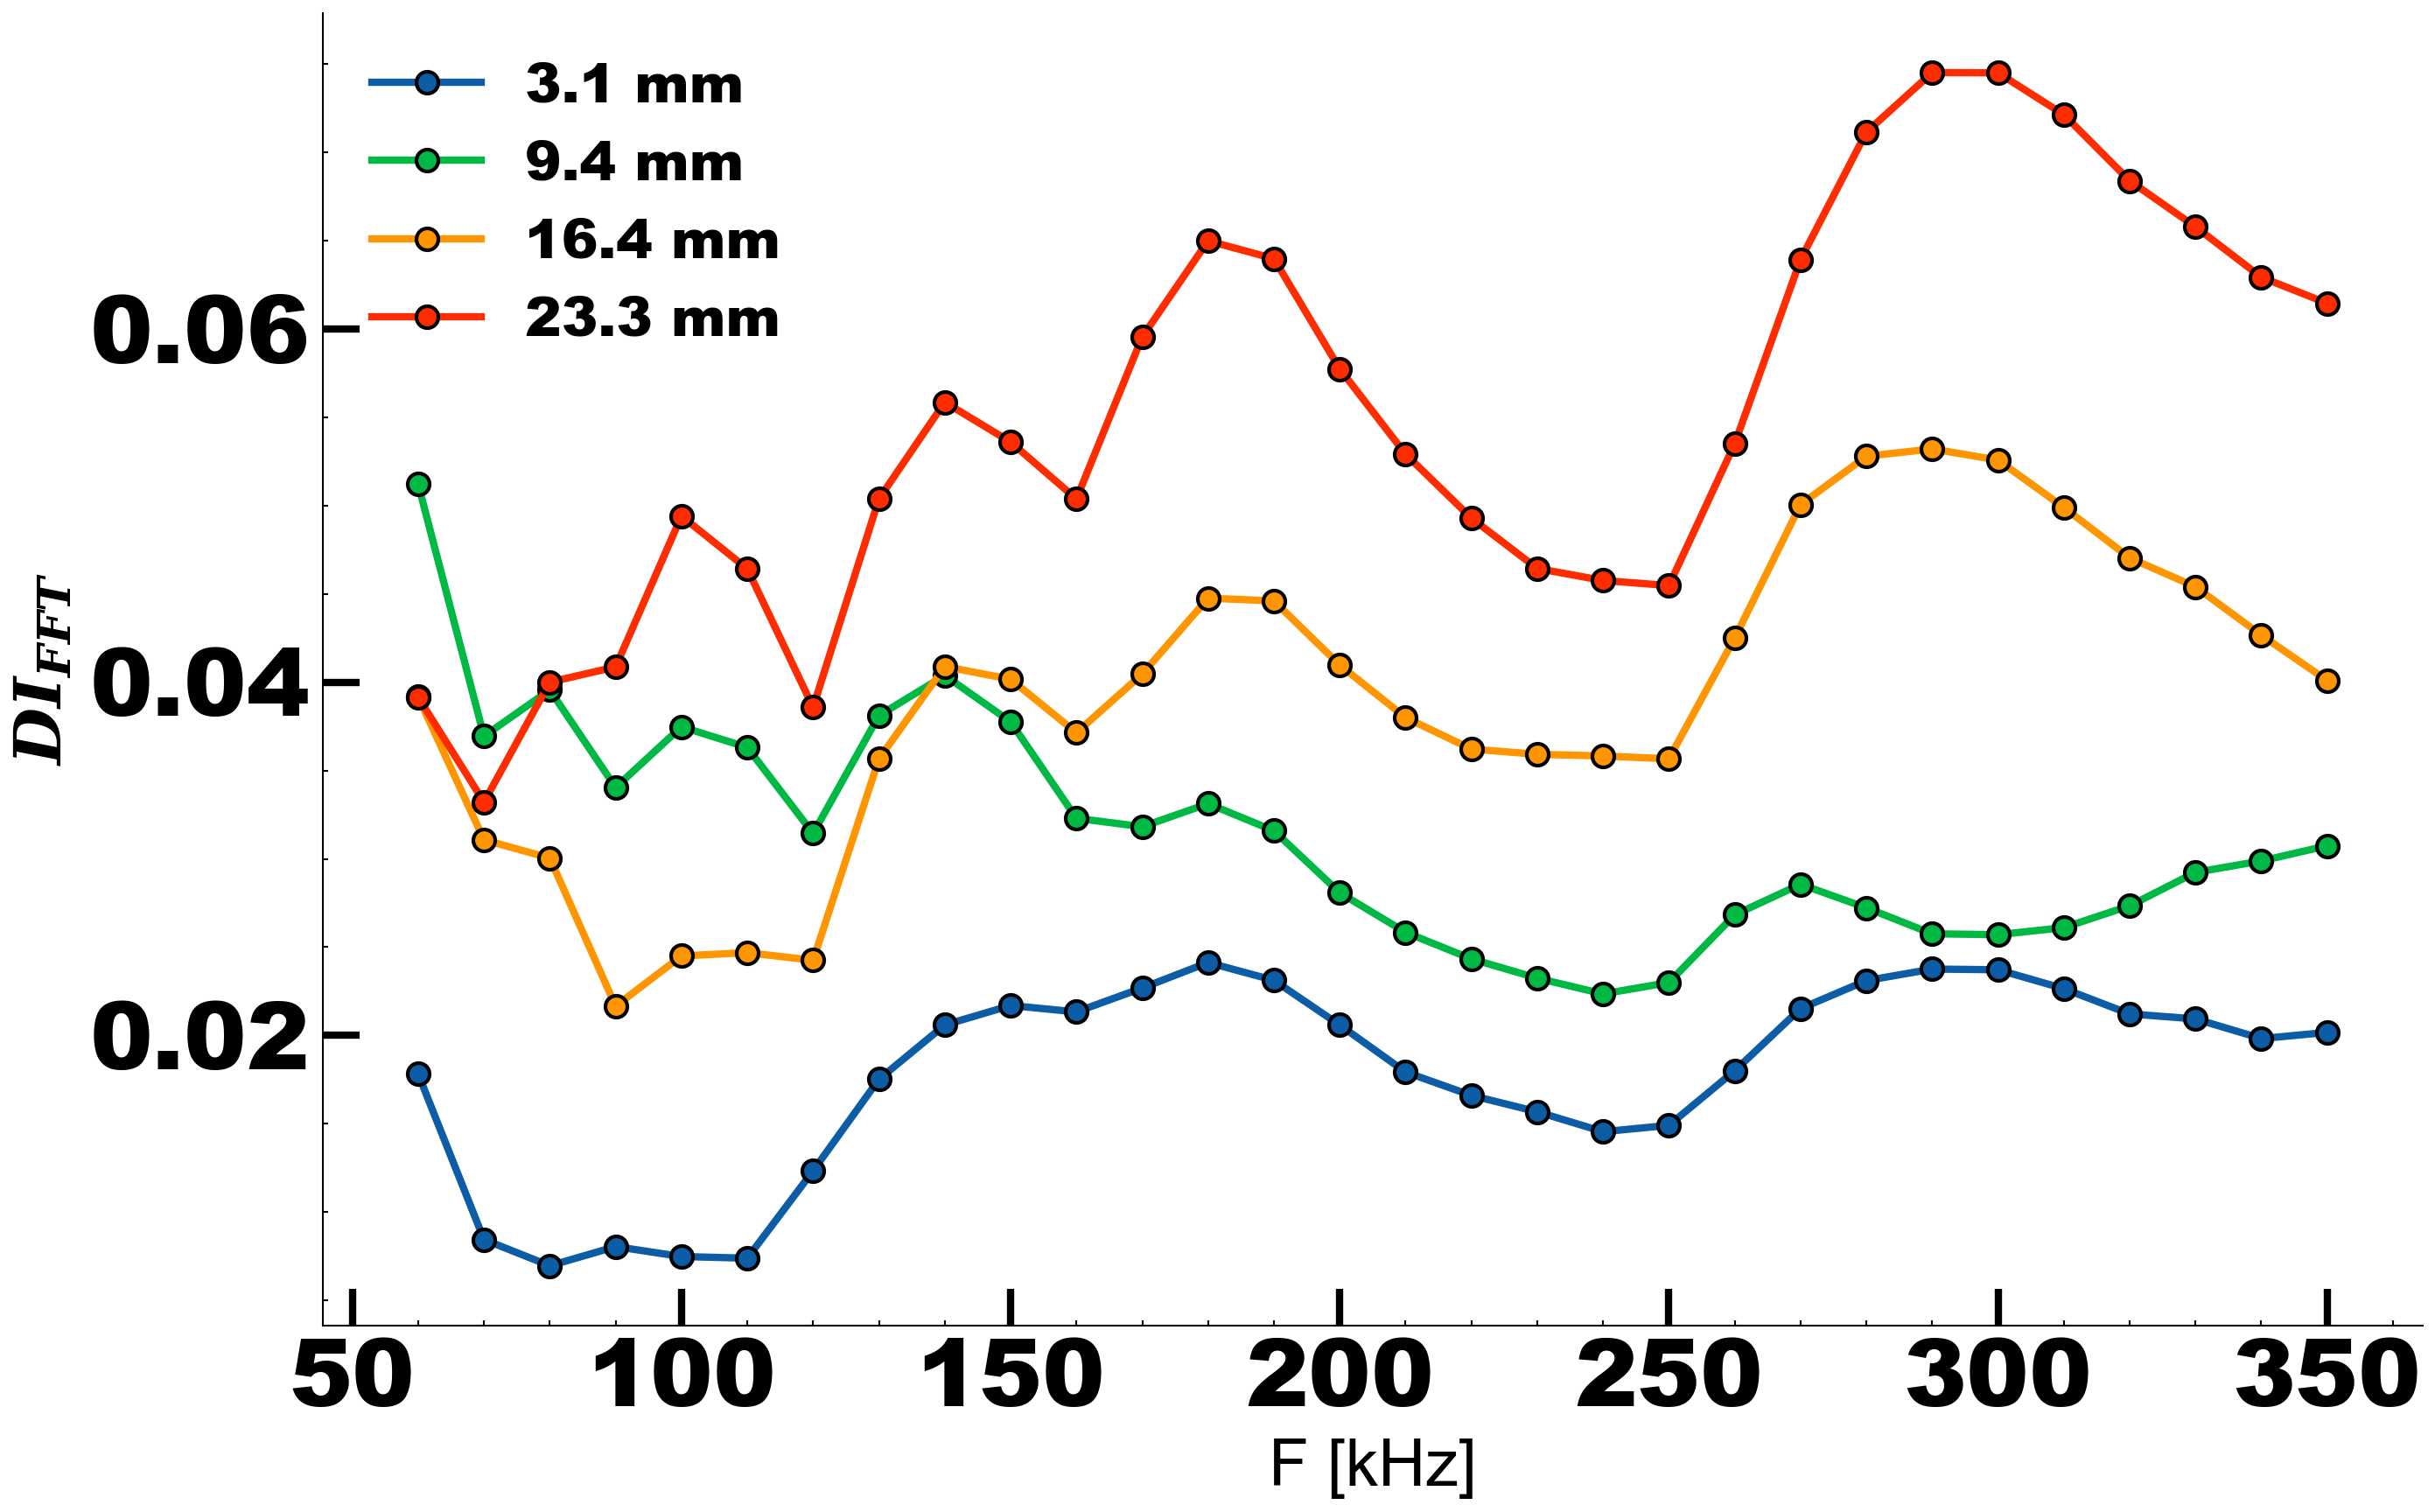

In [14]:
Z_FFT=np.mean(Exp.max_FFT, axis=2)[:,:,0,1,0] # mean at the samples 
print(Z_MA.shape)
x_MA=Freq
y_MA=np.mean(Exp_CL, axis=-1)
xv, yv = np.meshgrid(x_MA, y_MA, indexing='xy')
fig=plt.figure(figsize=(8,5))
ax0=fig.add_axes([0,0,1,1])
for i in np.arange(1,21,5):
    ax0.plot(x_MA, Z_FFT[:,i], marker='o', label=str(np.round(y_MA[i],1))+' mm', linewidth=2,markeredgecolor='k' )
ax0.legend(fontsize=15)
ax0.set_xlabel('F [kHz]')
ax0.set_ylabel('$DI_{FFT}$')

(30, 21)


Text(0, 0.5, '$DI_{FFT}$')

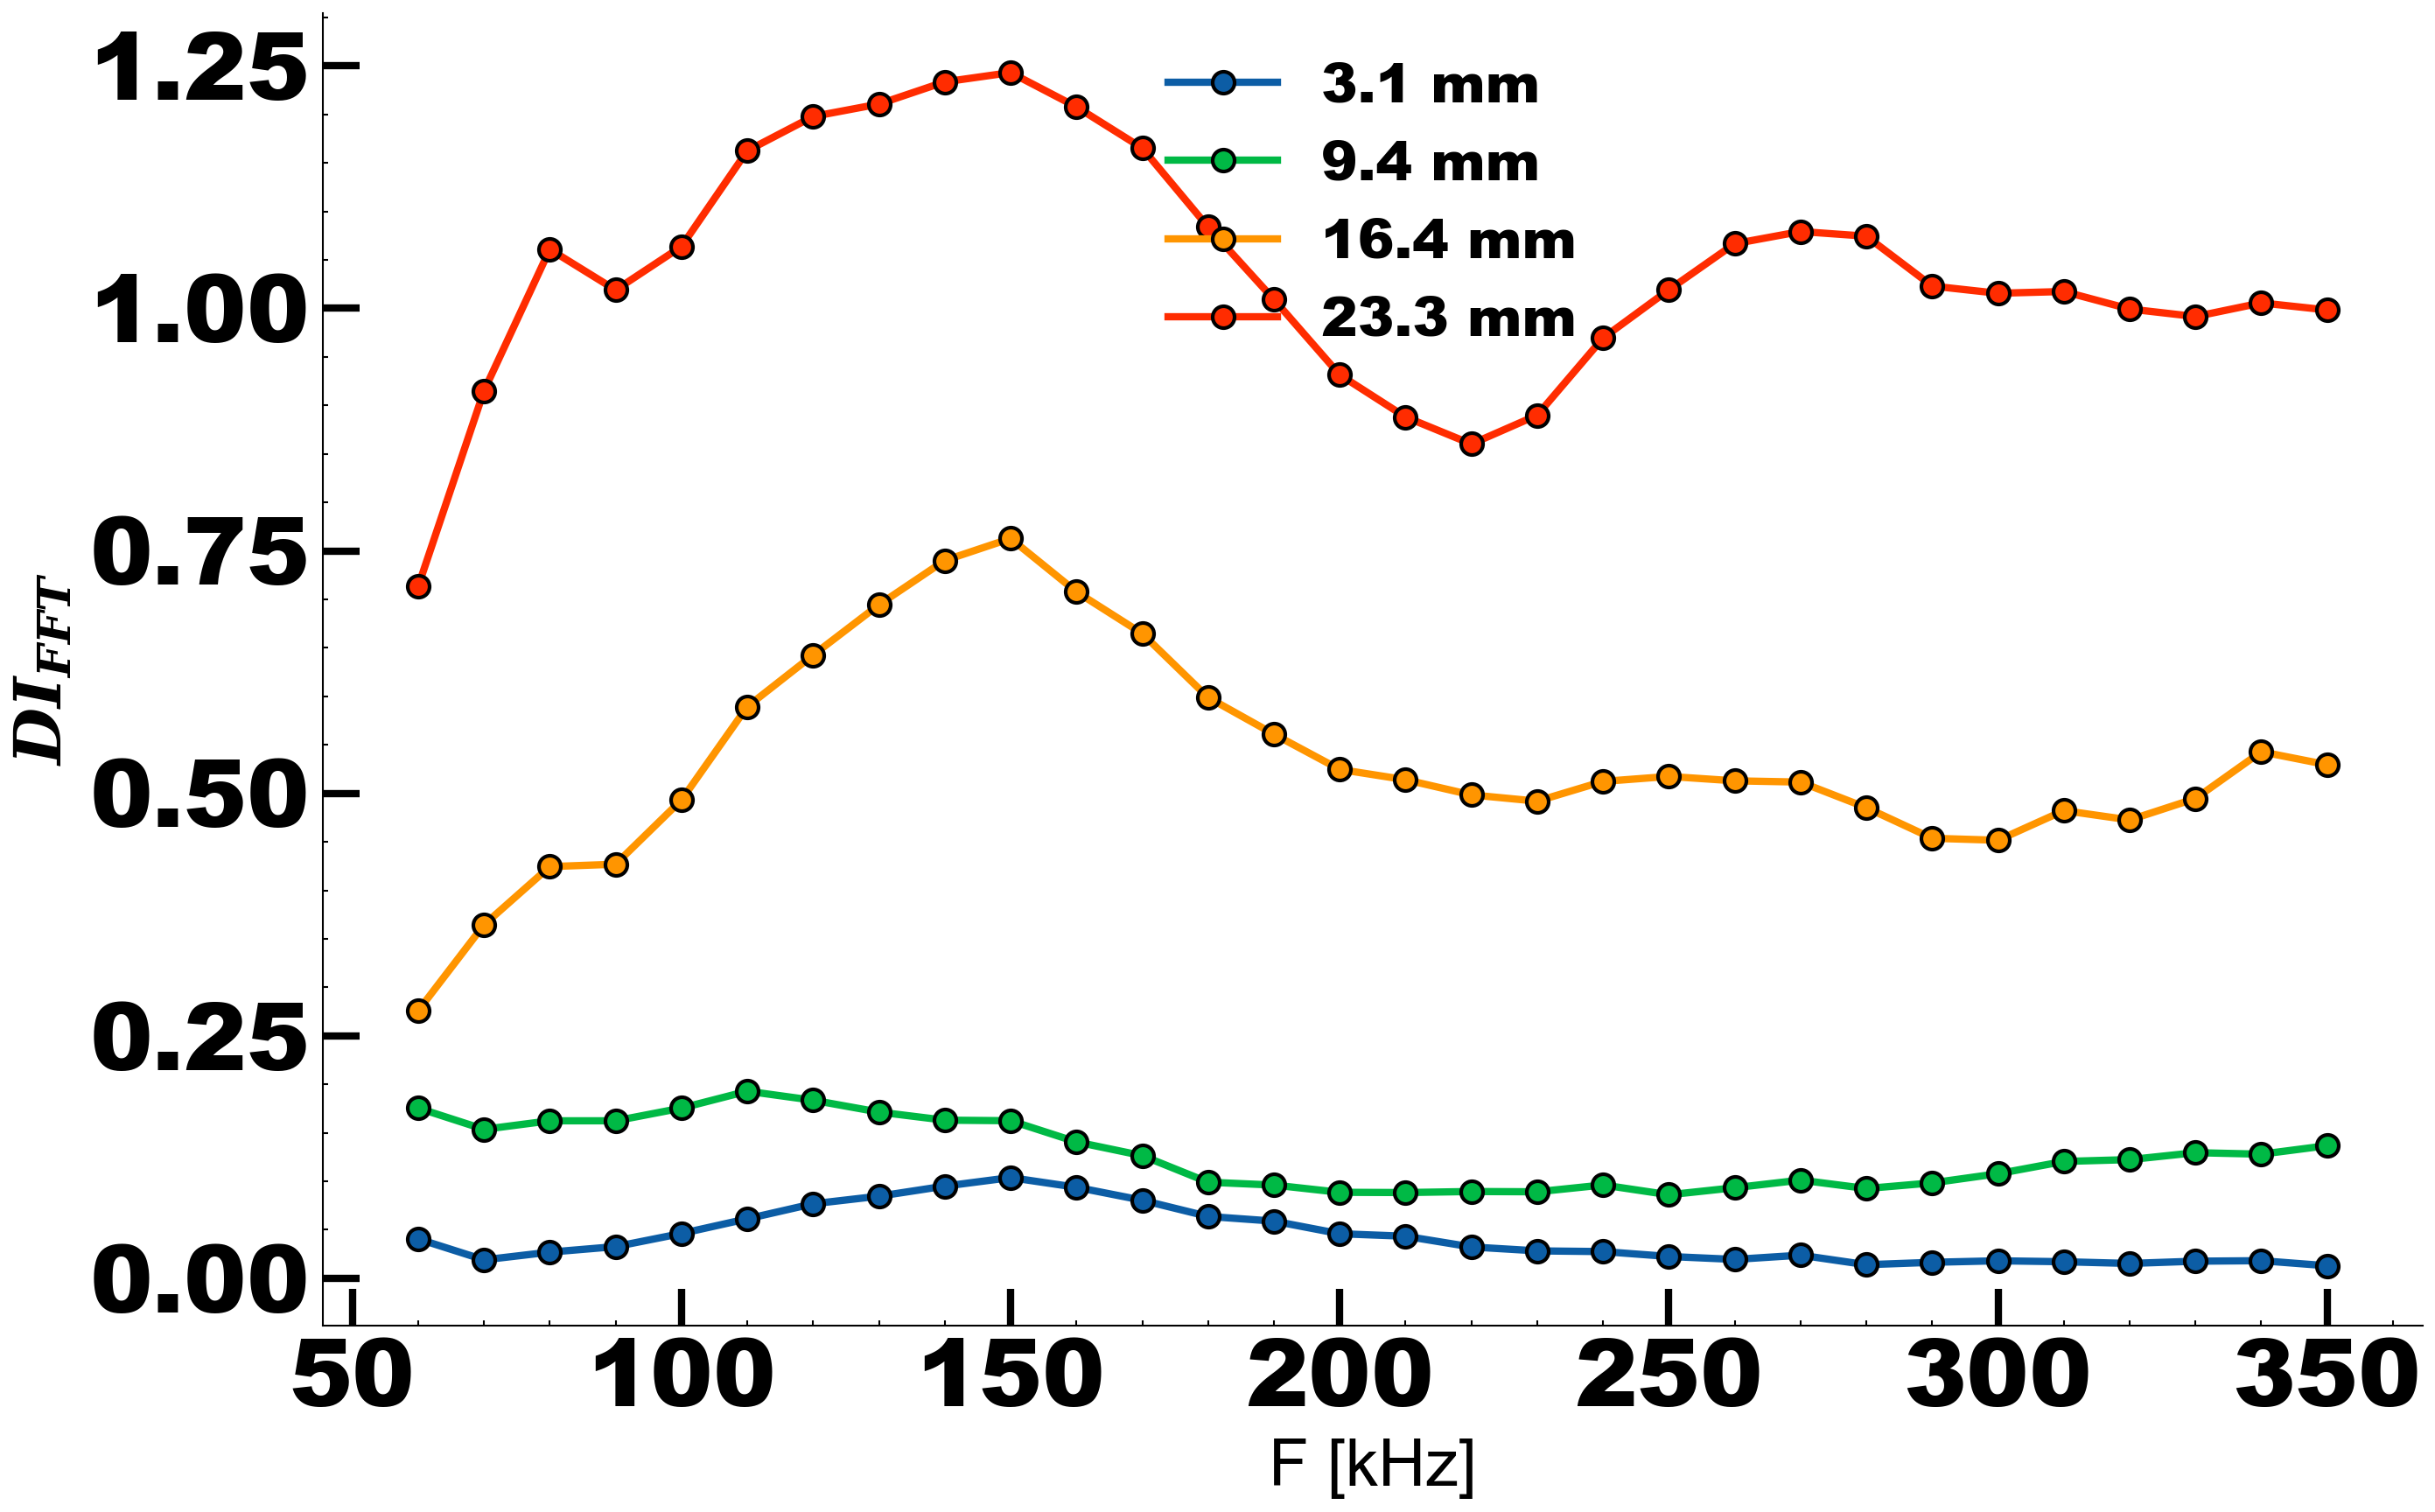

In [15]:
Z_Corr=np.mean(Exp.Corr, axis=2)[:,:,0,1,0] # mean at the samples 
print(Z_MA.shape)
x_MA=Freq
y_MA=np.mean(Exp_CL, axis=-1)
xv, yv = np.meshgrid(x_MA, y_MA, indexing='xy')
fig=plt.figure(figsize=(8,5))
ax0=fig.add_axes([0,0,1,1])
for i in np.arange(1,21,5):
    ax0.plot(x_MA, Z_Corr[:,i], marker='o', label=str(np.round(y_MA[i],1))+' mm', linewidth=2,markeredgecolor='k' )
ax0.legend(fontsize=15)
ax0.set_xlabel('F [kHz]')
ax0.set_ylabel('$DI_{FFT}$')

In [16]:
Exp.sum_CWT.shape

(21, 12, 4, 4, 1)

In [17]:
Z_CWT=np.mean(Exp.sum_CWT, axis=2)[:,0,1,0]
Z_CWT.shape

(21,)

No handles with labels found to put in legend.


(30, 21)


Text(0, 0.5, '$DI_{FFT}$')

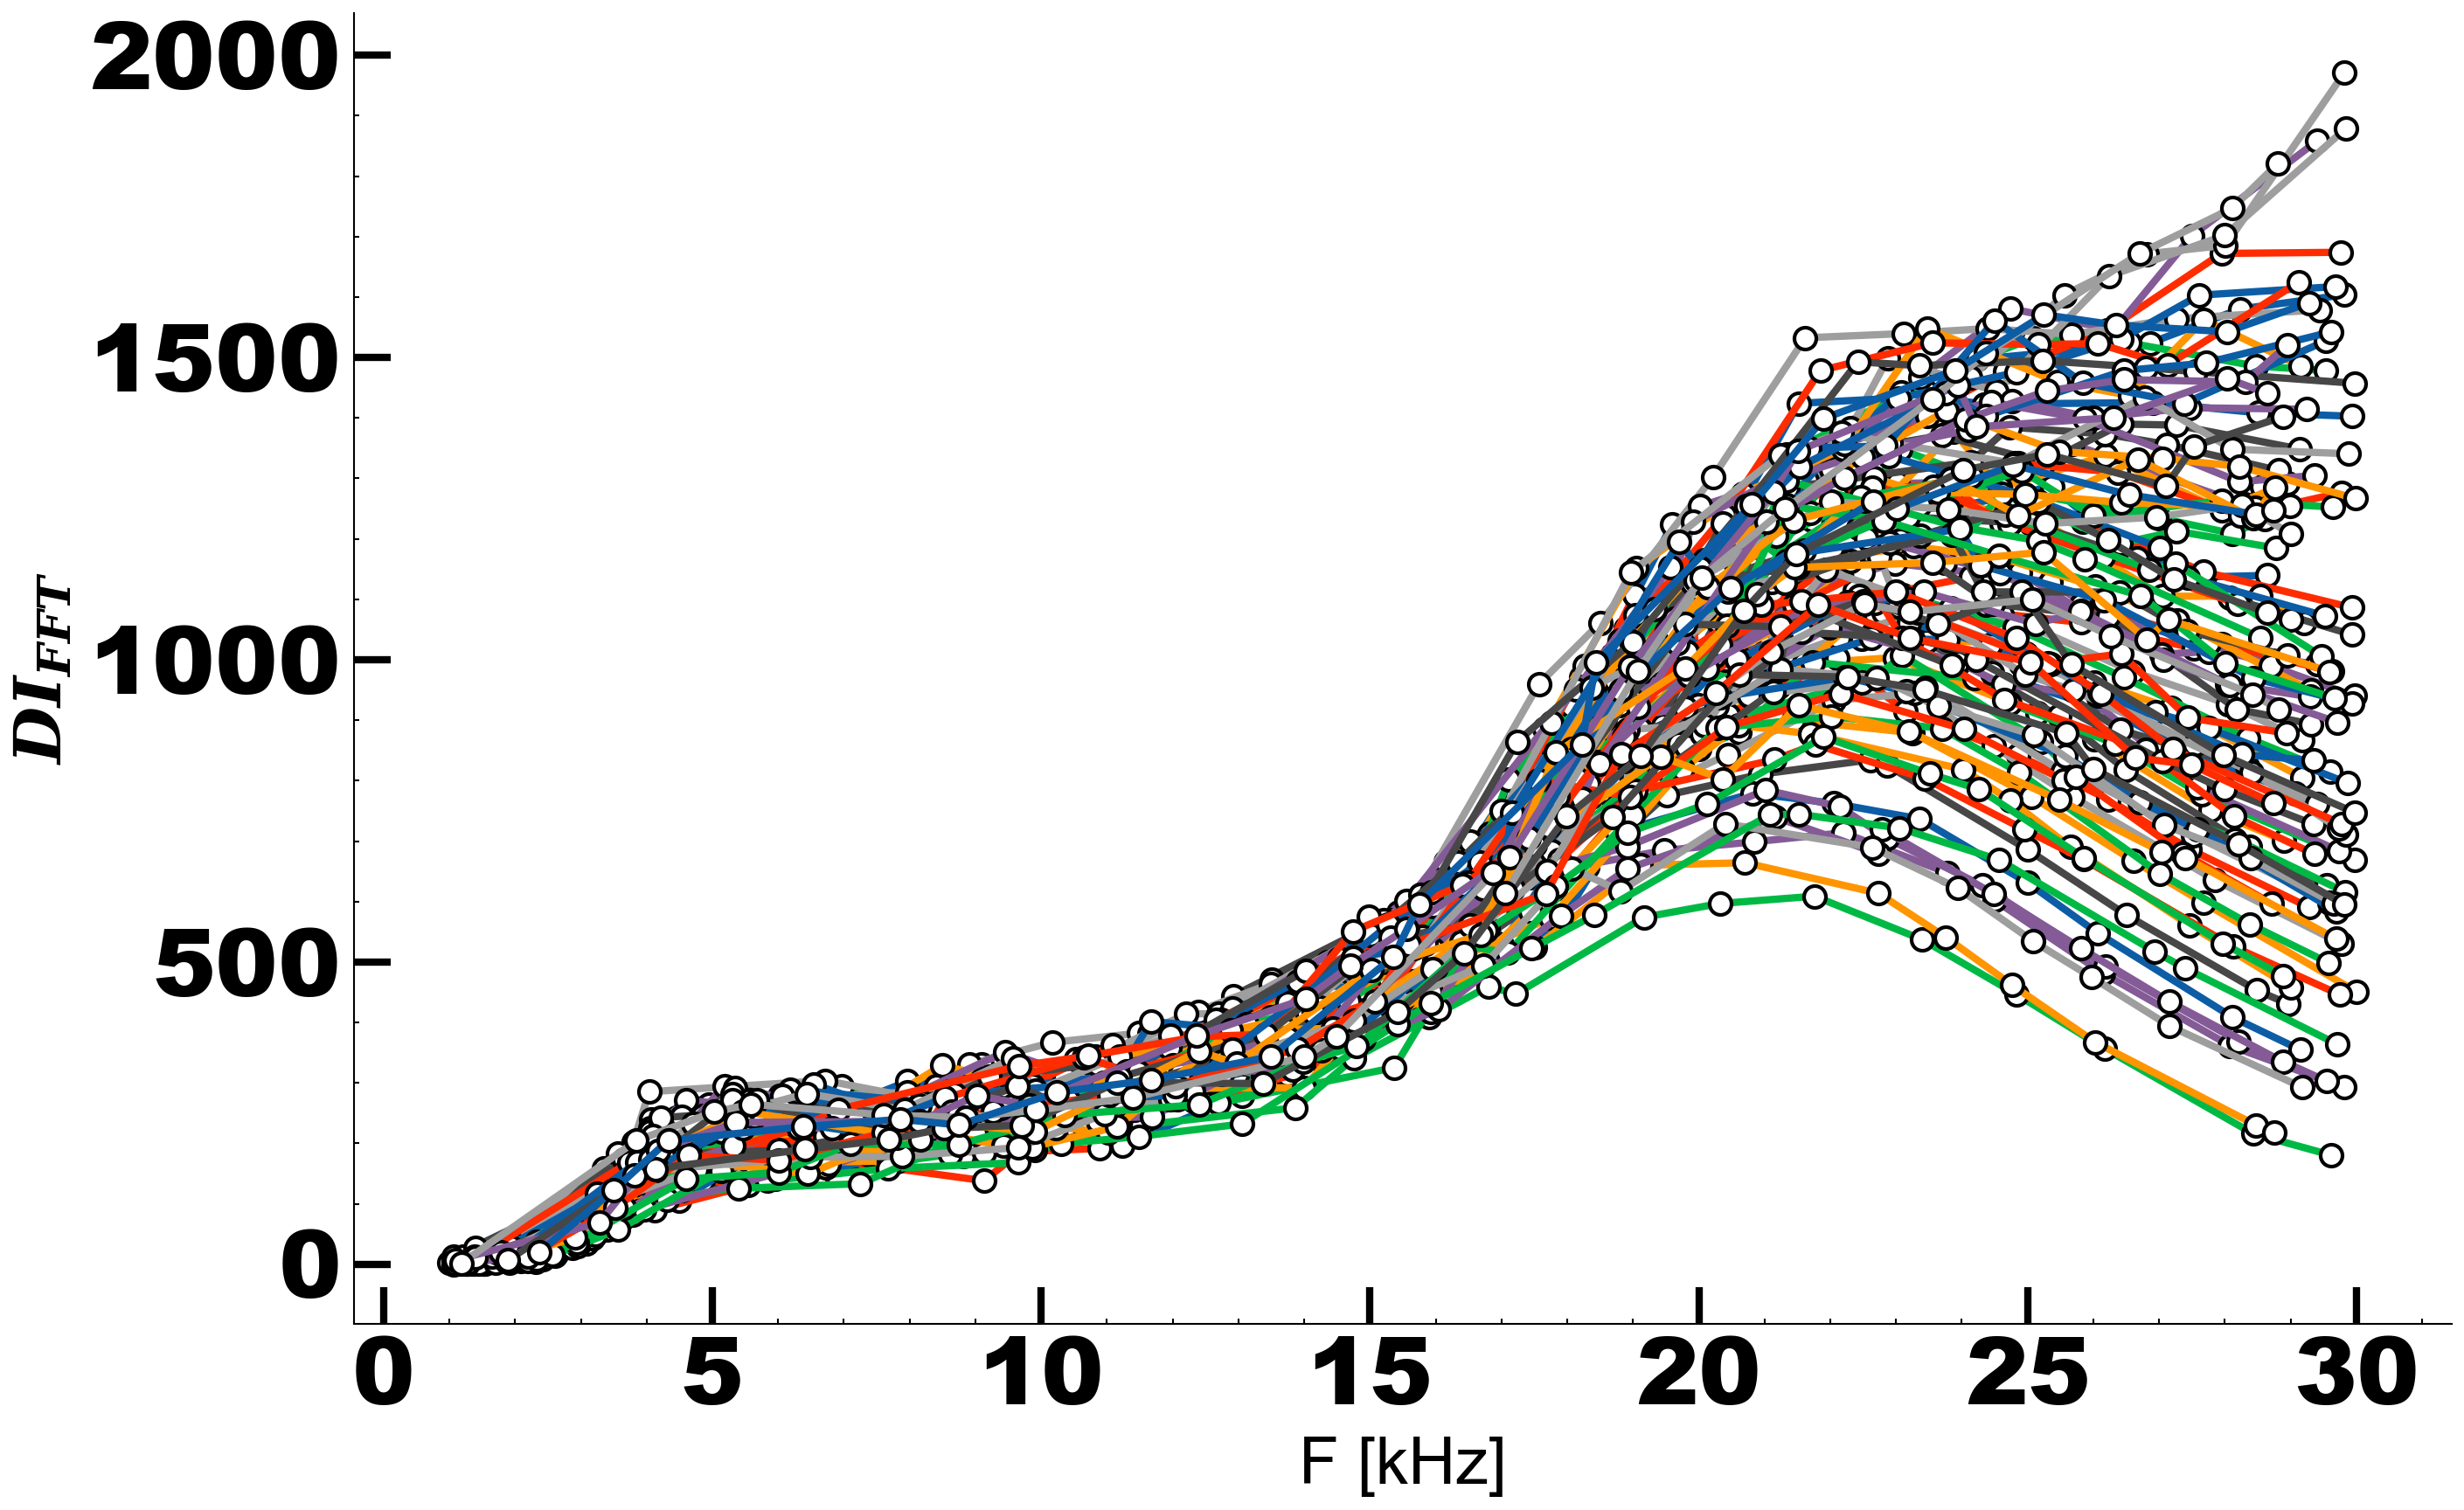

In [18]:
Z_CWT=(Sim.sum_CWT)# mean at the samples 
print(Z_MA.shape)
x_MA=Freq
y_MA=np.mean(Exp_CL, axis=-1)
xv, yv = np.meshgrid(x_MA, y_MA, indexing='xy')
fig=plt.figure(figsize=(8,5))
ax0=fig.add_axes([0,0,1,1])
for i in np.arange(0,99,1):
    ax0.plot(Sim_CL[:,i],Z_CWT[:,i,0,1,:], marker='o', linewidth=2,markeredgecolor='k' ,  markerfacecolor='w')
ax0.legend(fontsize=15)
ax0.set_xlabel('F [kHz]')
ax0.set_ylabel('$DI_{FFT}$')

### Damage Index plotting

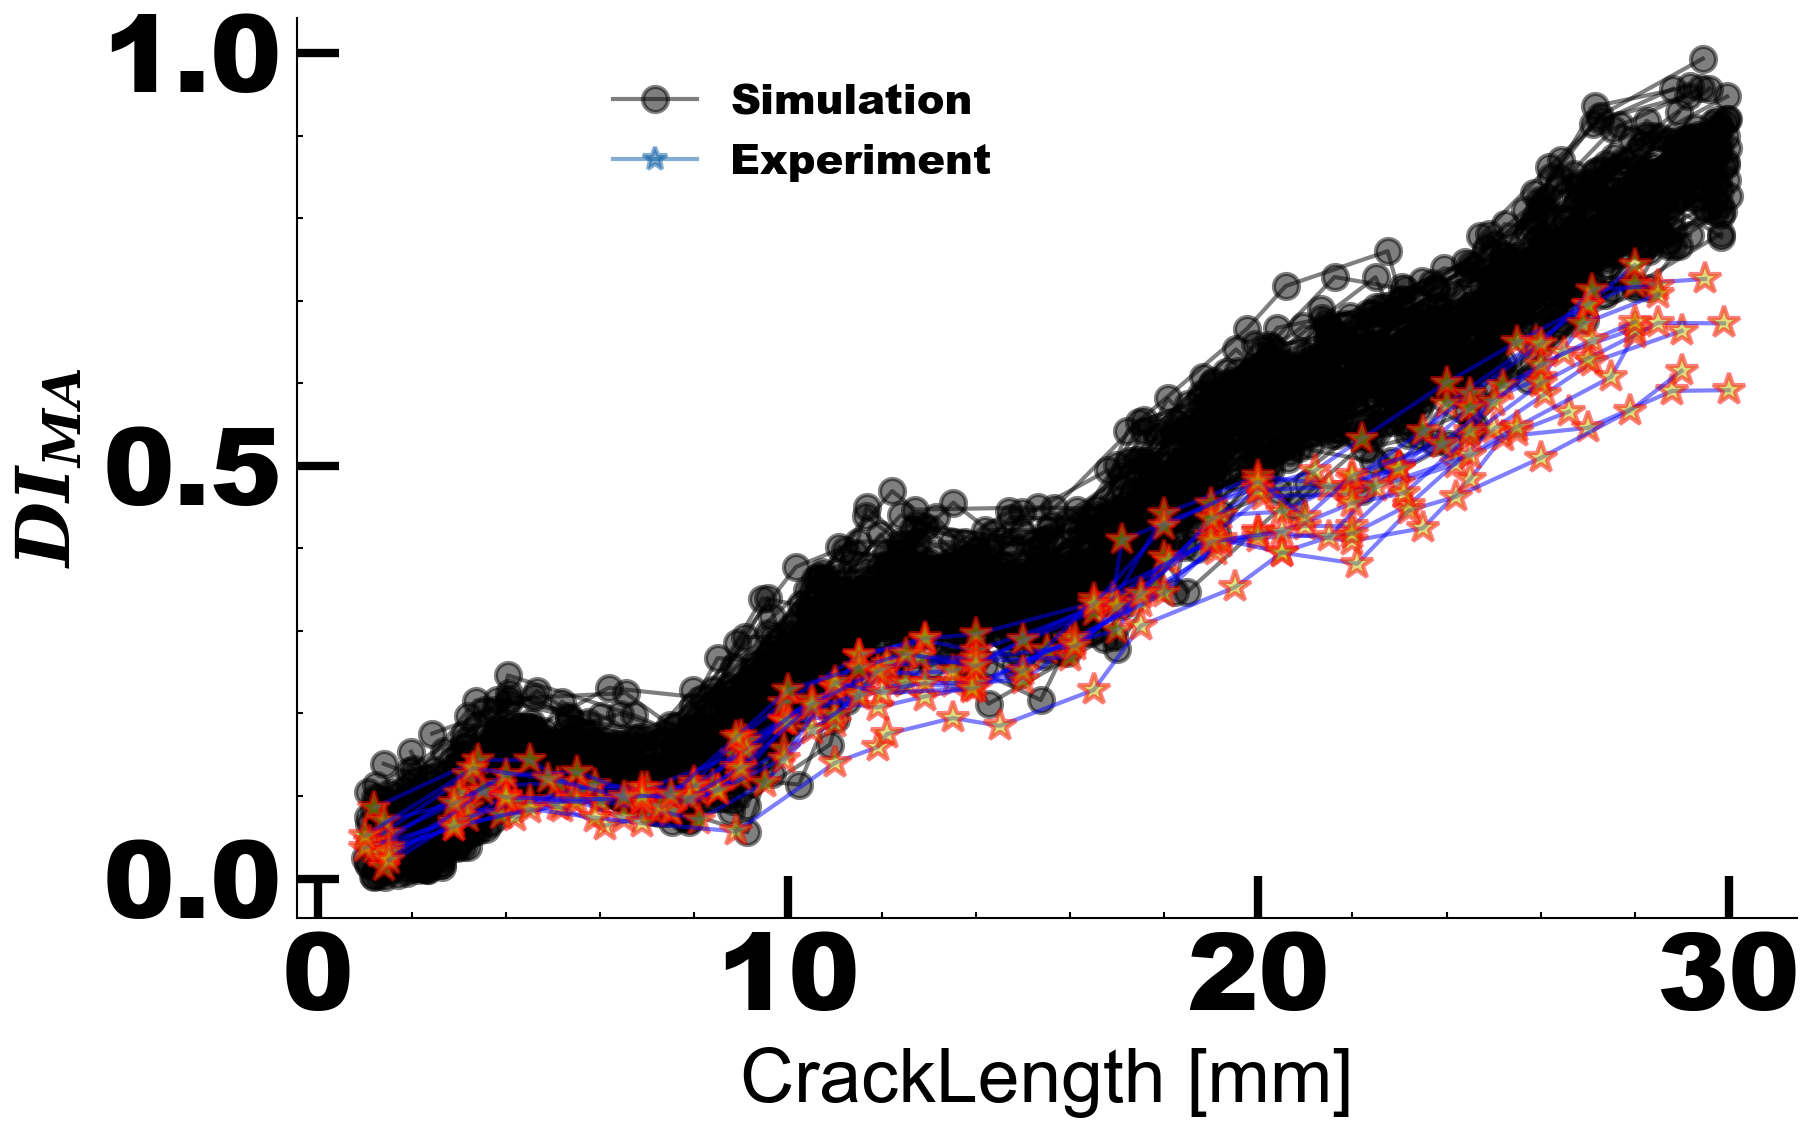

In [119]:
from matplotlib.pyplot import cm
path_save_fig='E:\Paper\Els_paper2\Figure\DamageIndex\MA\\'
fig_DI=plt.figure()
ax_DI=fig_DI.add_axes([0,0,1,1])
E=2
R=3
Marker=[".","P","o","v","_","|","d","X","s","p",'*',"+","D"]
color = iter(cm.jet(np.linspace(0, 1, 12)))
for isim,nsim in enumerate(np.arange(0,99,1)):
    ax_DI.plot(Sim_CL[:,isim], Sim.MA[0,:,isim, E,R,0],c='k', marker='o', alpha=0.5)
for iexp,nexp in enumerate(np.arange(0,12,1)):
    ax_DI.plot(Exp_CL[:,iexp], Exp.MA[4,:,iexp, E,R,0],c='b', alpha=0.5, marker='*',markeredgecolor='r',
    markerfacecolor='y',markersize=8)
blue_line = mlines.Line2D([], [], color='black', label='Simulation', linestyle='-', alpha=0.5, marker='o')
Red_line = mlines.Line2D([], [], label='Experiment', alpha=0.5, marker='*')
ax_DI.legend(handles=[blue_line,Red_line], loc=[0.2,0.8], fontsize=10)
ax_DI.set_ylabel('$DI_{MA}$')
ax_DI.set_xlabel('CrackLength [mm]')
fig_DI.savefig(path_save_fig+'DamageIndex_100kHz'+'Path'+str(E+1)+'to'+str(R+1)+ '.pdf', dpi=600, transparent=False, bbox_inches='tight')
fig_DI.savefig(path_save_fig+'DamageIndex_100kHz'+'Path'+str(E+1)+'to'+str(R+1)+ '.png', dpi=600, transparent=False, bbox_inches='tight')